# Carga de los datos

Por medio de la Api de Youtube se realiza el scrping de los comentarios de un video dado un link que guardaremos de momento en `videoId`. La Api de Youtube requiere una llave para, la cual tiene los permisos para hacer el scraping. Esta llave la guardaremos en la `apiKey`.

Para más información de como hacer el scraping desde la API de Youtube pulse [aquí](https://github.com/YouTube890/Youtube-Api/tree/815a220b494acea0882026a813be883355d7d1a5/Consultas).

También en el anterior cuaderno se realiza la limpieza de los datos, corrgiendo errores ortográficos y eliminando caracteres extraños.



In [ ]:
from google.colab import drive
import pandas as pd

pd.set_option('display.max_columns', None) # desplegar el máximo de columnas
drive.mount('/content/drive')
comentarios_crr = pd.read_excel('/content/drive/My Drive/MineriaTrabajo/comentarios_crr.xlsx')
comentarios_crr

Mounted at /content/drive


,Unnamed: 0,Likes,CommentDisplay,CommentOriginal,Published,Updated,Autor,ChannelId,ChannelUrl,CommentOriginal.1,Corregidos,Corregidos2,Corregidos3
0,0,177,Tanto que nos quejamos de que <br>porqué duro ...,Tanto que nos quejamos de que \nporqué duro ta...,2022-11-04T05:26:02Z,2022-11-09T02:18:49Z,gertrudis de León,{'value': 'UCT-WNhYG1jaobTpwLpplV9Q'},http://www.youtube.com/channel/UCT-WNhYG1jaobT...,Tanto que nos quejamos de que \nporqué duro ta...,Tanto que nos quejamos de que porqué duro tant...,Tanto que nos quejamos de que porqué duro tant...,Tanto que nos quejamos de que porqué duro tant...
1,1,232,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,2022-11-03T20:42:01Z,2022-11-03T20:42:01Z,ruvens ruiz,{'value': 'UCJo51dbN_1n0cUf3ylj90Og'},http://www.youtube.com/channel/UCJo51dbN_1n0cU...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...
2,2,148,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,2022-11-04T03:15:25Z,2022-11-04T03:15:25Z,Eder Chambi,{'value': 'UC5nX0s2ECTUyYrYv8ihSM1Q'},http://www.youtube.com/channel/UC5nX0s2ECTUyYr...,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla
3,3,127,Esto se ve hermoso tantos años esperando una ...,Esto se ve hermoso tantos años esperando una ...,2022-11-03T15:41:47Z,2022-11-03T15:41:47Z,Lautaro Portillo,{'value': 'UCxAfVVuQ0O90FHGO6vr1uZg'},http://www.youtube.com/channel/UCxAfVVuQ0O90FH...,Esto se ve hermoso tantos años esperando una ...,Esto se ve hermoso tantos años esperando una 2...,Esto se ve hermoso tantos años esperando una 2...,Esto se ve hermoso tantos años esperando una 2...
4,4,38,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,2022-11-08T19:35:38Z,2022-11-08T19:35:38Z,Hugo balderrama Canelas,{'value': 'UC1jJHaVw5becHyYSJVFY0nA'},http://www.youtube.com/channel/UC1jJHaVw5becHy...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,0,No me gusta. Demasiado ordenador,No me gusta. Demasiado ordenador,2022-11-05T23:32:43Z,2022-11-05T23:32:43Z,Ali Catel,{'value': 'UCJ5GGwoTYwFlu12X1jmR8Mw'},http://www.youtube.com/channel/UCJ5GGwoTYwFlu1...,No me gusta. Demasiado ordenador,No me gusta. Demasiado ordenador,No me gusta . Demasiado ordenador,No me gusta . Demasiado ordenador
135,135,2,"Mucha agua y todo ,,pero parece que la histor...","Mucha agua y todo ,,pero parece que la histor...",2022-11-02T23:47:32Z,2022-11-02T23:47:32Z,leandro oyarzo,{'value': 'UCu8uI1ATuILuUFt43mtXhMA'},http://www.youtube.com/channel/UCu8uI1ATuILuUF...,"Mucha agua y todo ,,pero parece que la histor...","Mucha agua y todo ,,pero parece que la histori...","Mucha agua y todo , , pero parece que la his...","Mucha agua y todo , , pero parece que la histo..."
136,136,0,Cp,Cp,2022-11-03T01:20:49Z,2022-11-03T01:20:49Z,Mr Toin,{'value': 'UCqBKfmfWHGPeQW5fmWWq5iw'},http://www.youtube.com/channel/UCqBKfmfWHGPeQW...,Cp,Cp,Cp,C
137,137,0,Nada nuevo,Nada nuevo,2022-11-02T23:42:12Z,2022-11-02T23:42:12Z,Jonathan Gutierrez Moreno,{'value': 'UC7dXD5vm2jjq2wSd12sssLg'},http://www.youtube.com/channel/UC7dXD5vm2jjq2w...,Nada nuevo,Nada nuevo,Nada nuevo,Nada nuevo


# Preprocesamiento de los comentarios

Para poder ingresar los comentarios primero tenemos que pasarlos a modo de lista. 

In [ ]:
comentarios = comentarios_crr["Corregidos3"].astype(str).tolist()
comentarios

['Tanto que nos quejamos de que porqué duro tanto para salir que van 1 años y ahora amamos la calidad gráfica qué tiene . . . . .',
 'Ya 43 años y por fin la segunda parte de este evento cinematográfico',
 'Yo creo que Avatar 2 la va a romper en taquilla',
 'Esto se ve hermoso tantos años esperando una 2 segunda parte',
 'La banda sonora y los efectos visuales son impresionantes !',
 'Esta película habla del amor que si nos tuviésemos todos podríamos por fin vivir en paz',
 'Realmente increíble . . . A los 9 años vi la primera en D en el cine y recuerdo que pensaba que estaba dentro de la película por que los efectos eran muy realista Bueno , tenia 9 años en esa época todo era perfecto . Después la vi muchas veces en DVD y en fo Y me seguía gustando mucho a pesar de que decían que era copia de apontocas En fin . . . De los mejores directores de la época James cameron les va a cerrar la boca con esta película . Estoy seguro que la va a romper como con todas sus pelicular o si la veo en 

# Análisis de sentimientos desde 🤗 Hugging Face

Hugging Face es una comunidad donde se tiene de uso libre diferentes modelos de inteligencia artificial. Tambien permite,a través de una API propia interacuar con estos modelos. Con el fin de crear mejoras de los mismos. Para el análisis de sentimientos tenemos dos modelos preentrenados en español. La lista de todos los modelos la podemos encontrar [aquí](https://huggingface.co/models). 

Primero para el analisis de emociones vamos a usar un modelo `pysentimiento/robertuito-sentiment-analysis` el cual es en español. Y tiene como base un  modelo RoBERTa. Este modelo ha sido entrenado previamente con tweets en español, clasificandolos en positivo, neutral o negativo (POS, NEU, NEG).

Luego vamos a hacer un análisis de sentimientos mas detallado usando un modelo `Recognai/bert-base-spanish-wwm-cased-xnli` el cual tiene como base un modelo BERT multilenguaje.El cual ha sido entrenado enmaascarando texto en distintos idiomas y a partir de reentrenamiento para clasificar texto en diferentes categorías dadas.

Veamos un pequeño ejemplo de su uso

In [ ]:
!pip install transformers
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.7 MB/s 
     |████████████████████████████████| 182 kB 52.8 MB/s 
     |████████████████████████████████| 7.6 MB 33.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.8 MB/s 


In [ ]:
from transformers import pipeline

classifier1 = pipeline("sentiment-analysis",
                       model="BramVanroy/bert-base-multilingual-cased-hebban-reviews")


classifier2 = pipeline("zero-shot-classification", 
                       model="Recognai/bert-base-spanish-wwm-cased-xnli")

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/711M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/834 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
result1 = classifier1("Esta pelicula es horrible")
result1

[{'label': 'negative', 'score': 0.9272792935371399}]

In [ ]:
result2 = classifier2(
    "Se ve que todo puede pasar en esta película",
    candidate_labels=["me gusta", "lo amo", "me divierte" ,"me sorprende", "me entristece", "me enoja"],
    hypothesis_template="Siento que {}."
)
result2

{'sequence': 'Se ve que todo puede pasar en esta película',
 'labels': ['me sorprende',
  'me divierte',
  'me gusta',
  'me entristece',
  'me enoja',
  'lo amo'],
 'scores': [0.2648109793663025,
  0.20286662876605988,
  0.1664014607667923,
  0.1545572131872177,
  0.12073644250631332,
  0.09062723815441132]}

Ahora vamos a crear la lista que contiene estos resultados para los comentarios del video de YouTube

In [ ]:
result1 = classifier1(comentarios)
result2 = classifier2(
    comentarios,
    candidate_labels=["me gusta", "lo amo", "me divierte" ,"me sorprende", "me entristece", "me enoja"],
    hypothesis_template="Siento que {}.",
)

In [ ]:
result1

[{'label': 'positive', 'score': 0.7512937784194946},
 {'label': 'positive', 'score': 0.7818723320960999},
 {'label': 'negative', 'score': 0.7584949135780334},
 {'label': 'positive', 'score': 0.8012377023696899},
 {'label': 'positive', 'score': 0.7578933835029602},
 {'label': 'positive', 'score': 0.7619858980178833},
 {'label': 'negative', 'score': 0.46318525075912476},
 {'label': 'negative', 'score': 0.5304462909698486},
 {'label': 'positive', 'score': 0.7967842817306519},
 {'label': 'positive', 'score': 0.6221215128898621},
 {'label': 'negative', 'score': 0.47722122073173523},
 {'label': 'positive', 'score': 0.7254800796508789},
 {'label': 'positive', 'score': 0.7512409687042236},
 {'label': 'negative', 'score': 0.8462148308753967},
 {'label': 'negative', 'score': 0.4787868559360504},
 {'label': 'positive', 'score': 0.7590205073356628},
 {'label': 'positive', 'score': 0.7134963274002075},
 {'label': 'positive', 'score': 0.7627026438713074},
 {'label': 'negative', 'score': 0.7609496712

In [ ]:
result2

{'sequence': 'Se ve que todo puede pasar en esta película',
 'labels': ['me sorprende',
  'me divierte',
  'me gusta',
  'me entristece',
  'me enoja',
  'lo amo'],
 'scores': [0.2648109793663025,
  0.20286662876605988,
  0.1664014607667923,
  0.1545572131872177,
  0.12073644250631332,
  0.09062723815441132]}

# Adjuntar los resultados
Ahora que tenemos los resultados vamos a adjuntarlos a el conjunto de datos que descargamos y modificamos previamente.

## Análisis de sentimientos

In [ ]:
import pandas as pd

result1_df_score = pd.DataFrame(result1)
result1_df_score

,label,score
0,positive,0.751294
1,positive,0.781872
2,negative,0.758495
3,positive,0.801238
4,positive,0.757893
...,...,...
134,negative,0.987048
135,negative,0.455555
136,neutral,0.507845
137,negative,0.930375


In [ ]:
comentariosData = pd.concat([comentarios_crr,result1_df_score],axis=1)

In [ ]:
comentariosData

,Unnamed: 0,Likes,CommentDisplay,CommentOriginal,Published,Updated,Autor,ChannelId,ChannelUrl,CommentOriginal.1,Corregidos,Corregidos2,Corregidos3,label,score
0,0,177,Tanto que nos quejamos de que <br>porqué duro ...,Tanto que nos quejamos de que \nporqué duro ta...,2022-11-04T05:26:02Z,2022-11-09T02:18:49Z,gertrudis de León,{'value': 'UCT-WNhYG1jaobTpwLpplV9Q'},http://www.youtube.com/channel/UCT-WNhYG1jaobT...,Tanto que nos quejamos de que \nporqué duro ta...,Tanto que nos quejamos de que porqué duro tant...,Tanto que nos quejamos de que porqué duro tant...,Tanto que nos quejamos de que porqué duro tant...,positive,0.751294
1,1,232,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,2022-11-03T20:42:01Z,2022-11-03T20:42:01Z,ruvens ruiz,{'value': 'UCJo51dbN_1n0cUf3ylj90Og'},http://www.youtube.com/channel/UCJo51dbN_1n0cU...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,positive,0.781872
2,2,148,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,2022-11-04T03:15:25Z,2022-11-04T03:15:25Z,Eder Chambi,{'value': 'UC5nX0s2ECTUyYrYv8ihSM1Q'},http://www.youtube.com/channel/UC5nX0s2ECTUyYr...,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,negative,0.758495
3,3,127,Esto se ve hermoso tantos años esperando una ...,Esto se ve hermoso tantos años esperando una ...,2022-11-03T15:41:47Z,2022-11-03T15:41:47Z,Lautaro Portillo,{'value': 'UCxAfVVuQ0O90FHGO6vr1uZg'},http://www.youtube.com/channel/UCxAfVVuQ0O90FH...,Esto se ve hermoso tantos años esperando una ...,Esto se ve hermoso tantos años esperando una 2...,Esto se ve hermoso tantos años esperando una 2...,Esto se ve hermoso tantos años esperando una 2...,positive,0.801238
4,4,38,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,2022-11-08T19:35:38Z,2022-11-08T19:35:38Z,Hugo balderrama Canelas,{'value': 'UC1jJHaVw5becHyYSJVFY0nA'},http://www.youtube.com/channel/UC1jJHaVw5becHy...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,positive,0.757893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,0,No me gusta. Demasiado ordenador,No me gusta. Demasiado ordenador,2022-11-05T23:32:43Z,2022-11-05T23:32:43Z,Ali Catel,{'value': 'UCJ5GGwoTYwFlu12X1jmR8Mw'},http://www.youtube.com/channel/UCJ5GGwoTYwFlu1...,No me gusta. Demasiado ordenador,No me gusta. Demasiado ordenador,No me gusta . Demasiado ordenador,No me gusta . Demasiado ordenador,negative,0.987048
135,135,2,"Mucha agua y todo ,,pero parece que la histor...","Mucha agua y todo ,,pero parece que la histor...",2022-11-02T23:47:32Z,2022-11-02T23:47:32Z,leandro oyarzo,{'value': 'UCu8uI1ATuILuUFt43mtXhMA'},http://www.youtube.com/channel/UCu8uI1ATuILuUF...,"Mucha agua y todo ,,pero parece que la histor...","Mucha agua y todo ,,pero parece que la histori...","Mucha agua y todo , , pero parece que la his...","Mucha agua y todo , , pero parece que la histo...",negative,0.455555
136,136,0,Cp,Cp,2022-11-03T01:20:49Z,2022-11-03T01:20:49Z,Mr Toin,{'value': 'UCqBKfmfWHGPeQW5fmWWq5iw'},http://www.youtube.com/channel/UCqBKfmfWHGPeQW...,Cp,Cp,Cp,C,neutral,0.507845
137,137,0,Nada nuevo,Nada nuevo,2022-11-02T23:42:12Z,2022-11-02T23:42:12Z,Jonathan Gutierrez Moreno,{'value': 'UC7dXD5vm2jjq2wSd12sssLg'},http://www.youtube.com/channel/UC7dXD5vm2jjq2w...,Nada nuevo,Nada nuevo,Nada nuevo,Nada nuevo,negative,0.930375


In [ ]:
#pd.DataFrame(list(zip(result2[])), columns =['key', 'value'])

SyntaxError: ignored

In [ ]:
def get_label_score_dict(row):
    result_dict = dict()
    for _label, _score in zip(row['labels'], row['scores']):
        result_dict.update({_label: _score})
    return result_dict

In [ ]:
get_label_score_dict(result2[0])

{'lo amo': 0.2539512813091278,
 'me sorprende': 0.24176722764968872,
 'me enoja': 0.19231179356575012,
 'me gusta': 0.16133730113506317,
 'me divierte': 0.08014433830976486,
 'me entristece': 0.07048805803060532}

In [ ]:
get_label_score_dict(result2[3])

{'me divierte': 0.35993465781211853,
 'me gusta': 0.3428768515586853,
 'me sorprende': 0.14469385147094727,
 'lo amo': 0.10190936923027039,
 'me entristece': 0.02687308005988598,
 'me enoja': 0.023712102323770523}

In [ ]:
list_of_rows = result2
result = list(map(lambda x: get_label_score_dict(x), list_of_rows))
result2_df_score = pd.DataFrame(result)
result2_df_score

,lo amo,me sorprende,me enoja,me gusta,me divierte,me entristece
0,0.253951,0.241767,0.192312,0.161337,0.080144,0.070488
1,0.092219,0.283424,0.117538,0.128955,0.161034,0.216831
2,0.028066,0.491243,0.138059,0.048441,0.112336,0.181855
3,0.101909,0.144694,0.023712,0.342877,0.359935,0.026873
4,0.071648,0.330343,0.026860,0.175218,0.370891,0.025040
...,...,...,...,...,...,...
134,0.011415,0.469448,0.100809,0.064633,0.082138,0.271557
135,0.081409,0.360859,0.100109,0.171187,0.190900,0.095536
136,0.073076,0.381502,0.109562,0.143463,0.161950,0.130447
137,0.054177,0.427420,0.078961,0.126907,0.164431,0.148102


In [ ]:
def get_label_topscore_dict(row, threshold):
    result_dict = dict()
    for _label, _score in zip(row['labels'], row['scores']):
        if _score > threshold:
            result_dict.update({_label: 1})
        else:
            result_dict.update({_label: 0})
    return result_dict

In [ ]:
get_label_topscore_dict(result2[0],0.3)

{'lo amo': 0,
 'me sorprende': 0,
 'me enoja': 0,
 'me gusta': 0,
 'me divierte': 0,
 'me entristece': 0}

In [ ]:
get_label_topscore_dict(result2[3],0.3)


{'me divierte': 1,
 'me gusta': 1,
 'me sorprende': 0,
 'lo amo': 0,
 'me entristece': 0,
 'me enoja': 0}

In [ ]:
list_of_rows = result2
th = 0.3    #whatever threshold value you want
result = list(map(lambda x: get_label_topscore_dict(x, th), list_of_rows))
result_df_topscore = pd.DataFrame(result)
result_df_topscore

,lo amo,me sorprende,me enoja,me gusta,me divierte,me entristece
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,1,1,0
4,0,1,0,0,1,0
...,...,...,...,...,...,...
134,0,1,0,0,0,0
135,0,1,0,0,0,0
136,0,1,0,0,0,0
137,0,1,0,0,0,0


In [ ]:
comentariosData = pd.concat([comentariosData,result2_df_score],axis=1)

In [ ]:
comentariosData

,Unnamed: 0,Likes,CommentDisplay,CommentOriginal,Published,Updated,Autor,ChannelId,ChannelUrl,CommentOriginal.1,Corregidos,Corregidos2,Corregidos3,label,score,lo amo,me sorprende,me enoja,me gusta,me divierte,me entristece
0,0,177,Tanto que nos quejamos de que <br>porqué duro ...,Tanto que nos quejamos de que \nporqué duro ta...,2022-11-04T05:26:02Z,2022-11-09T02:18:49Z,gertrudis de León,{'value': 'UCT-WNhYG1jaobTpwLpplV9Q'},http://www.youtube.com/channel/UCT-WNhYG1jaobT...,Tanto que nos quejamos de que \nporqué duro ta...,Tanto que nos quejamos de que porqué duro tant...,Tanto que nos quejamos de que porqué duro tant...,Tanto que nos quejamos de que porqué duro tant...,positive,0.751294,0.253951,0.241767,0.192312,0.161337,0.080144,0.070488
1,1,232,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,2022-11-03T20:42:01Z,2022-11-03T20:42:01Z,ruvens ruiz,{'value': 'UCJo51dbN_1n0cUf3ylj90Og'},http://www.youtube.com/channel/UCJo51dbN_1n0cU...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,Ya 43 años y por fin la segunda parte de este ...,positive,0.781872,0.092219,0.283424,0.117538,0.128955,0.161034,0.216831
2,2,148,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,2022-11-04T03:15:25Z,2022-11-04T03:15:25Z,Eder Chambi,{'value': 'UC5nX0s2ECTUyYrYv8ihSM1Q'},http://www.youtube.com/channel/UC5nX0s2ECTUyYr...,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,Yo creo que Avatar 2 la va a romper en taquilla,negative,0.758495,0.028066,0.491243,0.138059,0.048441,0.112336,0.181855
3,3,127,Esto se ve hermoso tantos años esperando una ...,Esto se ve hermoso tantos años esperando una ...,2022-11-03T15:41:47Z,2022-11-03T15:41:47Z,Lautaro Portillo,{'value': 'UCxAfVVuQ0O90FHGO6vr1uZg'},http://www.youtube.com/channel/UCxAfVVuQ0O90FH...,Esto se ve hermoso tantos años esperando una ...,Esto se ve hermoso tantos años esperando una 2...,Esto se ve hermoso tantos años esperando una 2...,Esto se ve hermoso tantos años esperando una 2...,positive,0.801238,0.101909,0.144694,0.023712,0.342877,0.359935,0.026873
4,4,38,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,2022-11-08T19:35:38Z,2022-11-08T19:35:38Z,Hugo balderrama Canelas,{'value': 'UC1jJHaVw5becHyYSJVFY0nA'},http://www.youtube.com/channel/UC1jJHaVw5becHy...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,La banda sonora y los efectos visuales son imp...,positive,0.757893,0.071648,0.330343,0.026860,0.175218,0.370891,0.025040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,0,No me gusta. Demasiado ordenador,No me gusta. Demasiado ordenador,2022-11-05T23:32:43Z,2022-11-05T23:32:43Z,Ali Catel,{'value': 'UCJ5GGwoTYwFlu12X1jmR8Mw'},http://www.youtube.com/channel/UCJ5GGwoTYwFlu1...,No me gusta. Demasiado ordenador,No me gusta. Demasiado ordenador,No me gusta . Demasiado ordenador,No me gusta . Demasiado ordenador,negative,0.987048,0.011415,0.469448,0.100809,0.064633,0.082138,0.271557
135,135,2,"Mucha agua y todo ,,pero parece que la histor...","Mucha agua y todo ,,pero parece que la histor...",2022-11-02T23:47:32Z,2022-11-02T23:47:32Z,leandro oyarzo,{'value': 'UCu8uI1ATuILuUFt43mtXhMA'},http://www.youtube.com/channel/UCu8uI1ATuILuUF...,"Mucha agua y todo ,,pero parece que la histor...","Mucha agua y todo ,,pero parece que la histori...","Mucha agua y todo , , pero parece que la his...","Mucha agua y todo , , pero parece que la histo...",negative,0.455555,0.081409,0.360859,0.100109,0.171187,0.190900,0.095536
136,136,0,Cp,Cp,2022-11-03T01:20:49Z,2022-11-03T01:20:49Z,Mr Toin,{'value': 'UCqBKfmfWHGPeQW5fmWWq5iw'},http://www.y

# Gráficos
Dados los resultados anteriores vamos a realizar dos gráficos que nos describan los resultados anteriores. 

## WordClouds
Un Word Cloud o nube de palabras (también conocida como tag cloud, wordle o lista ponderada en diseño visual) es una representación visual de datos de texto, que a menudo se usa para representar metadatos de palabras clave en sitios web o para visualizar texto de forma libre. Las etiquetas suelen ser palabras sueltas y la importancia de cada etiqueta se muestra con el tamaño o el color de la fuente. Cuando se utilizan como ayudas para la navegación del sitio web, los términos están vinculados a los elementos asociados con la etiqueta.

Para generar estos gráficos vamos a usar la librería [worcloud](https://pypi.org/project/wordcloud/) en python.

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Antes definamos las palabras que son conectores, advervios entre otras del español que pueden saturar el gráfico y no brindarían información de lo que se pretende mostrar. Para mas ver [aquí](https://cr0wg4n.medium.com/palabras-vac%C3%ADas-en-espa%C3%B1ol-stop-words-ft-python-3117e52d2bff)

In [ ]:
stop_words = ["a","actualmente","adelante","además","afirmó","agregó","ahora","ahí","al","algo","alguna","algunas","alguno","algunos","algún","alrededor","ambos","ampleamos","ante","anterior","antes","apenas","aproximadamente","aquel","aquellas","aquellos","aqui","aquí","arriba","aseguró","así","atras","aunque","ayer","añadió","aún","bajo","bastante","bien","buen","buena","buenas","bueno","buenos","cada","casi","cerca","cierta","ciertas","cierto","ciertos","cinco","comentó","como","con","conocer","conseguimos","conseguir","considera","consideró","consigo","consigue","consiguen","consigues","contra","cosas","creo","cual","cuales","cualquier","cuando","cuanto","cuatro","cuenta","cómo","da","dado","dan","dar","de","debe","deben","debido","decir","dejó","del","demás","dentro","desde","después","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","donde","dos","durante","e","ejemplo","el","ella","ellas","ello","ellos","embargo","empleais","emplean","emplear","empleas","empleo","en","encima","encuentra","entonces","entre","era","erais","eramos","eran","eras","eres","es","esa","esas","ese","eso","esos","esta","estaba","estabais","estaban","estabas","estad","estada","estadas","estado","estados","estais","estamos","estan","estando","estar","estaremos","estará","estarán","estarás","estaré","estaréis","estaría","estaríais","estaríamos","estarían","estarías","estas","este","estemos","esto","estos","estoy","estuve","estuviera","estuvierais","estuvieran","estuvieras","estuvieron","estuviese","estuvieseis","estuviesen","estuvieses","estuvimos","estuviste","estuvisteis","estuviéramos","estuviésemos","estuvo","está","estábamos","estáis","están","estás","esté","estéis","estén","estés","ex","existe","existen","explicó","expresó","fin","fue","fuera","fuerais","fueran","fueras","fueron","fuese","fueseis","fuesen","fueses","fui","fuimos","fuiste","fuisteis","fuéramos","fuésemos","gran","grandes","gueno","ha","haber","habida","habidas","habido","habidos","habiendo","habremos","habrá","habrán","habrás","habré","habréis","habría","habríais","habríamos","habrían","habrías","habéis","había","habíais","habíamos","habían","habías","hace","haceis","hacemos","hacen","hacer","hacerlo","haces","hacia","haciendo","hago","han","has","hasta","hay","haya","hayamos","hayan","hayas","hayáis","he","hecho","hemos","hicieron","hizo","hoy","hube","hubiera","hubierais","hubieran","hubieras","hubieron","hubiese","hubieseis","hubiesen","hubieses","hubimos","hubiste","hubisteis","hubiéramos","hubiésemos","hubo","igual","incluso","indicó","informó","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","junto","la","lado","largo","las","le","les","llegó","lleva","llevar","lo","los","luego","lugar","manera","manifestó","mayor","me","mediante","mejor","mencionó","menos","mi","mientras","mio","mis","misma","mismas","mismo","mismos","modo","momento","mucha","muchas","mucho","muchos","muy","más","mí","mía","mías","mío","míos","nada","nadie","ni","ninguna","ningunas","ninguno","ningunos","ningún","no","nos","nosotras","nosotros","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","os","otra","otras","otro","otros","para","parece","parte","partir","pasada","pasado","pero","pesar","poca","pocas","poco","pocos","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","podrá","podrán","podría","podrían","poner","por","por qué","porque","posible","primer","primera","primero","primeros","principalmente","propia","propias","propio","propios","próximo","próximos","pudo","pueda","puede","pueden","puedo","pues","que","quedó","queremos","quien","quienes","quiere","quién","qué","realizado","realizar","realizó","respecto","sabe","sabeis","sabemos","saben","saber","sabes","se","sea","seamos","sean","seas","segunda","segundo","según","seis","ser","seremos","será","serán","serás","seré","seréis","sería","seríais","seríamos","serían","serías","seáis","señaló","si","sido","siempre","siendo","siete","sigue","siguiente","sin","sino","sobre","sois","sola","solamente","solas","solo","solos","somos","son","soy","su","sus","suya","suyas","suyo","suyos","sí","sólo","tal","también","tampoco","tan","tanto","te","tendremos","tendrá","tendrán","tendrás","tendré","tendréis","tendría","tendríais","tendríamos","tendrían","tendrías","tened","teneis","tenemos","tener","tenga","tengamos","tengan","tengas","tengo","tengáis","tenida","tenidas","tenido","tenidos","teniendo","tenéis","tenía","teníais","teníamos","tenían","tenías","tercera","ti","tiempo","tiene","tienen","tienes","toda","todas","todavía","todo","todos","total","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","trata","través","tres","tu","tus","tuve","tuviera","tuvierais","tuvieran","tuvieras","tuvieron","tuviese","tuvieseis","tuviesen","tuvieses","tuvimos","tuviste","tuvisteis","tuviéramos","tuviésemos","tuvo","tuya","tuyas","tuyo","tuyos","tú","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","usted","va","vais","valor","vamos","van","varias","varios","vaya","veces","ver","verdad","verdadera","verdadero","vez","vosotras","vosotros","voy","vuestra","vuestras","vuestro","vuestros","y","ya","yo","él","éramos","ésta","éstas","éste","éstos","última","últimas","último","últimos"]

In [ ]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import ast # decode-encode

reviews_negative = comentariosData.loc[comentariosData["label"]=="negative"]["CommentDisplay"].values
reviews_positive = comentariosData.loc[comentariosData["label"]=="positive"]["CommentDisplay"].values 

str(reviews_negative)

'[\'Yo creo que Avatar 2 la va a romper en taquilla\'\n \'Realmente increible...<br>A los 9 años vi la primera en 3D en el cine y recuerdo que pensaba que estaba dentro de la película por que los efectos eran muy realista <br>Bueno, tenia 9 años en esa epoca todo era perfecto.<br>Despues la vi muchas veces en dvd y en fox <br>Y me seguia gustando mucho a pesar de que decian que era copia de pocahontas <br>En fin...<br>De los mejores directores de la época <br>James cameron les va a cerrar la boca con esta pelicula.<br>Estoy seguro que la va a romper como con todas sus peliculas<br>Si o si la veo en su estreno\'\n \'Este trailer está mucho mejor que el primero 😀\'\n \'Nos estamos haciendo la idea que será la película más épica del mundo, pero no nos hagamos ideas locas solo disfrutemos de que existe una secuela\'\n \'La va a romper, con los 12 años que se lleva esperando... debe ser un peliculón.\'\n \'Una preciosa secuela 😊\'\n \'DESDE HACE AÑOS ME VENGO COMIENDO LA TEORÍA DE Q VA A SA

In [ ]:
# Generate a word cloud - negative sentiment
wordcloud_neg = WordCloud(collocation_threshold = 2,
                          stopwords=stop_words,
                          collocations= True,
                          background_color="white",
                          colormap="afmhot").generate(str(reviews_negative))

# Generate a word cloud - positive sentiment
wordcloud_pos = WordCloud(collocation_threshold = 2,
                          stopwords=stop_words,
                          collocations= True,
                          background_color="white",
                          colormap="Set1").generate(str(reviews_positive))

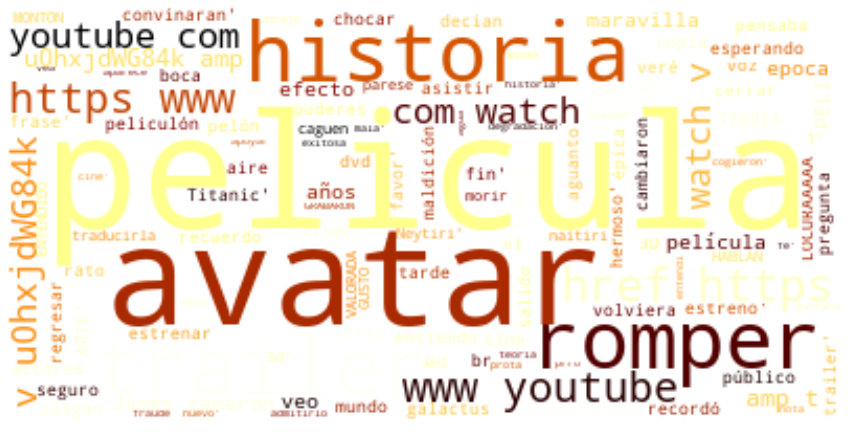

In [ ]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

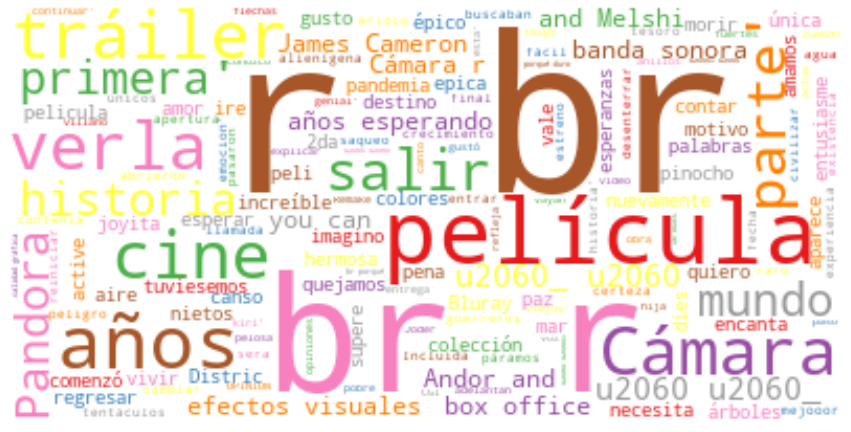

In [ ]:
plt.figure( figsize=(15,10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bubble chart
referencia [aquí](https://github.com/PetrKorab/Advanced-Visualisations-for-Text-Data-Analysis/blob/main/analysis_github.ipynb)

In [ ]:
# Class available from https://matplotlib.org/3.5.0/gallery/misc/packed_bubbles.html
import numpy as np

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):

        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):

        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


In [ ]:
data_neg = {
    'bigrams': ["me sorprende",	
                "me divierte",
                "me gusta",
                "lo amo",
                "me entristece",
                "me enoja"],

    'frequency': [comentariosData.loc[comentariosData["label"]=="negative"]["me sorprende"].sum(),
                  comentariosData.loc[comentariosData["label"]=="negative"]["me divierte"].sum(),
                  comentariosData.loc[comentariosData["label"]=="negative"]["me gusta"].sum(),
                  comentariosData.loc[comentariosData["label"]=="negative"]["lo amo"].sum(),
                  comentariosData.loc[comentariosData["label"]=="negative"]["me entristece"].sum(),
                  comentariosData.loc[comentariosData["label"]=="negative"]["me enoja"].sum()],

    'color': ['#FC944A', '#EF4026', 'goldenrod','green', '#F9C784', '#FC944A', 'coral']
}

data_pos = {
    'bigrams': ["me sorprende",	
                "me divierte",
                "me gusta",
                "lo amo",
                "me entristece",
                "me enoja"],

    'frequency': [comentariosData.loc[comentariosData["label"]=="positive"]["me sorprende"].sum(),
                  comentariosData.loc[comentariosData["label"]=="positive"]["me divierte"].sum(),
                  comentariosData.loc[comentariosData["label"]=="positive"]["me gusta"].sum(),
                  comentariosData.loc[comentariosData["label"]=="positive"]["lo amo"].sum(),
                  comentariosData.loc[comentariosData["label"]=="positive"]["me entristece"].sum(),
                  comentariosData.loc[comentariosData["label"]=="positive"]["me enoja"].sum()],

    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A',
              '#F24C00', '#00B825']
}


In [ ]:
bubble_chart_neg = BubbleChart(area=data_neg['frequency'],
                           bubble_spacing=0.3)
bubble_chart_pos = BubbleChart(area=data_pos['frequency'],
                           bubble_spacing=0.3)

bubble_chart_neg.collapse()
bubble_chart_pos.collapse()

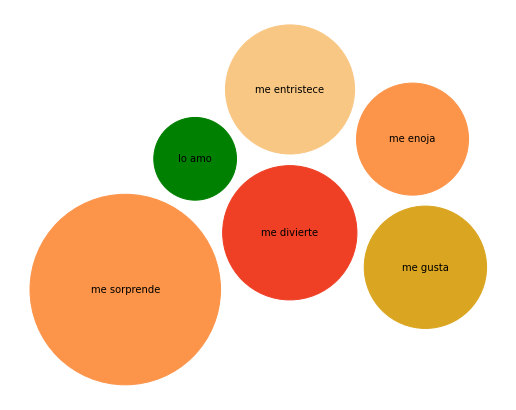

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart_neg.plot(
    ax, data_neg['bigrams'], data_neg['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()

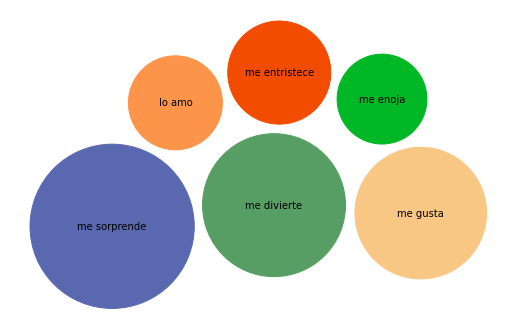

In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart_pos.plot(
    ax, data_pos['bigrams'], data_pos['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.show()